# Machine Learning

import libraries

In [57]:
import os  
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
# --------cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# -------- classification
import sklearn
from sklearn import neighbors, tree, ensemble, naive_bayes, svm
# *** KNN
from sklearn.neighbors import KNeighborsClassifier
# *** Decision Tree; Random Forest
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# *** Naive Bayes
from sklearn.naive_bayes import GaussianNB
# *** SVM classifier
from sklearn.svm import SVC
# --------  metrics:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import make_scorer
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, MinMaxScaler


read "clean_data" file that include the data after edited

In [58]:
#Load the CSV into a DataFrame
df = pd.read_csv(r'clean_data.csv')

#A copy of the data for backup
clean_df = df.iloc[:,1:].copy()

Editing the data for machine learning

In [59]:
df_ml = clean_df.copy()
df_ml.drop(['Game'],axis=1, inplace = True)
df_ml["Hit_Games"].value_counts()

0    14451
1     3036
Name: Hit_Games, dtype: int64

In [60]:
df_ml['Genre'] = preprocessing.LabelEncoder().fit_transform(clean_df['Genre'])
df_ml['Console'] = preprocessing.LabelEncoder().fit_transform(clean_df['Console'])
df_ml['Publisher'] = preprocessing.LabelEncoder().fit_transform(clean_df['Publisher'])
df_ml['Developer'] = preprocessing.LabelEncoder().fit_transform(clean_df['Developer'])
df_ml

,Pos,Genre,Console,Publisher,Developer,NA_Sales,PAL_Sales,Japan_Sales,Other_Sales,Total_Sales,Relese_Month,Relese_Year,Hit_Games
0,1,0,36,846,2480,0,0,0,0,51000000,3,2005,1
1,2,0,36,484,2072,0,0,0,0,47820000,6,1997,1
2,3,0,36,164,521,0,0,0,0,25200000,10,2001,1
3,4,0,36,484,2072,0,0,0,0,21150000,6,1997,1
4,5,0,36,509,1579,0,0,0,0,20000000,10,1981,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17482,461,17,31,442,1376,0,0,30000,0,30000,11,2012,0
17483,462,17,32,16,53,0,0,30000,0,30000,2,2014,0
17484,463,17,27,662,2014,0,0,40000,0,40000,8,2014,0
17485,464,17,28,697,1531,0,0,30000,0,30000,11,2016,0


Auxiliary function for splitting the data for machine learning

In [61]:
def split_to_train_and_test(dataset, label_column, test_ratio, rand_state):
    training = dataset.columns[dataset.columns != label_column]
    target = label_column
    X = dataset[training]
    y = dataset[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=rand_state)
    return X_train, X_test, y_train, y_test

test_ratio, rand_state = 0.2, 42
X_train, X_test, y_train, y_test = split_to_train_and_test(df_ml, "Hit_Games", test_ratio, rand_state)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(13989, 12) (3498, 12) (13989,) (3498,)


Scale the data

In [62]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Auxiliary function for finding the best k for the knn algorithm

In [63]:
def find_best_k_for_KNN(X_train, y_train):
    params={"n_neighbors":[3,7,9,11]}
    knn = KNeighborsClassifier()
    clf = GridSearchCV(knn, params,scoring=make_scorer(metrics.f1_score, greater_is_better=True))
    clf.fit(X_train,y_train)
    best_K = clf.best_params_['n_neighbors']
    best_f1_val = clf.best_score_
    return best_K, best_f1_val
best_K, best_f1_KNN_params = find_best_k_for_KNN(X_train, y_train)
# --- add additional code to check your code if needed:
best_K, best_f1_KNN_params

(3, 0.7949445293706445)

Auxiliary function for finding the best depth in a tree and a minimum amount of values per group

In [64]:
def find_best_decision_tree_params(X_train, y_train):
    parameters={'max_depth':[2,4,6,8,10],'min_samples_split':[5,10,15,20]}
    clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters,scoring=make_scorer(metrics.f1_score, greater_is_better=True))
    clf.fit(X_train,y_train)
    best_max_depth = clf.best_params_['max_depth']
    best_min_samples_split = clf.best_params_['min_samples_split']
    best_f1_val = clf.best_score_
    return best_max_depth, best_min_samples_split, best_f1_val
best_max_dep, best_min_smpl_splt, best_f1_DT_params = find_best_decision_tree_params(X_train, y_train)
best_max_dep, best_min_smpl_splt, best_f1_DT_params

(2, 5, 1.0)

Auxiliary function that returns the model of the requested algorithm

In [65]:
def get_classifier_obj(classifier_name, params):

    if(classifier_name == 'KNN'):
        clf=KNeighborsClassifier(n_neighbors=params['n_neighbors'])
    if(classifier_name == 'decision_tree'):
        clf=tree.DecisionTreeClassifier(max_depth=params['max_depth'], min_samples_split=params['min_samples_split'])
    if(classifier_name == 'svm'):
        clf=svm.SVC()
    if(classifier_name == 'naive_bayes'):
        clf=GaussianNB()
    if(classifier_name == 'LogisticRegression'):    
        clf=linear_model.LogisticRegression()
    return clf

Auxiliary function for calculating the prediction results using the cross validation method

In [66]:
def calc_evaluation_val(eval_metric, y_true, y_predicted):
    if(eval_metric == 'accuracy'):
        evaluation_val = accuracy_score(y_true = y_true, y_pred = y_predicted)
    elif(eval_metric == 'precision'):
        evaluation_val=  precision_score(y_true = y_true, y_pred = y_predicted)
    elif(eval_metric == 'recall'):
        evaluation_val = recall_score(y_true = y_true, y_pred = y_predicted)
    elif(eval_metric == 'f1'):
        evaluation_val = f1_score(y_true = y_true, y_pred = y_predicted)
    elif(eval_metric == 'confusion_matrix'):
        evaluation_val = metrics.confusion_matrix(y_true = y_true, y_pred = y_predicted)
        df_confusion = pd.DataFrame(evaluation_val , index=['Actual Negative','Actual Positive'],columns=['Predicted Negative','Predicted Positive'])
        print("confusion matrix:\n")
        display(df_confusion)
        return
    return evaluation_val

Auxiliary function for displaying a graph

In [76]:
#took from https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh
def plot_res(evaluation,train_scores,test_scores,alg):
    
    font = {'size': 25}
    plt.rc('font', **font)

    x = np.arange(len(evaluation))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots(figsize=(30,15))
    rects1 = ax.bar(x - width/2, train_scores, width, label='Train',color= "#228B22")
    rects2 = ax.bar(x + width/2, test_scores, width, label='Test',color= "#0000FF")

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores',fontsize=50)
    ax.set_title(f"{alg}\n",fontsize=50)
    ax.set_xticks(x)
    ax.set_xticklabels(evaluation,fontsize=30)
    ax.legend(fontsize=30,loc="lower left")


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()
    

Machine learning phase

In [68]:
params_knn = {'n_neighbors': best_K}
params_decision_tree = {'max_depth': best_max_dep, 'min_samples_split': best_min_smpl_splt}

In [69]:
clf_naive_bayes = get_classifier_obj("naive_bayes",None)
clf_svm = get_classifier_obj("svm",None)
clf_knn = get_classifier_obj("KNN",params_knn)   
clf_decision_tree = get_classifier_obj("decision_tree",params_decision_tree)
clf_logistic_regression = get_classifier_obj("LogisticRegression",None)

The training phase

In [70]:
clf_logistic_regression.fit(X_train,y_train)
clf_svm.fit(X_train,y_train)
clf_knn.fit(X_train,y_train)
clf_naive_bayes.fit(X_train,y_train)
clf_decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, min_samples_split=5)

The prediction phase

In [71]:
train_logistic_regression = clf_logistic_regression.predict(X_train)
train_svm = clf_svm.predict(X_train)
train_knn = clf_knn.predict(X_train)
train_naive_bayes = clf_naive_bayes.predict(X_train)
train_decision_tree = clf_decision_tree.predict(X_train)

In [72]:
predicted_logistic_regression = clf_logistic_regression.predict(X_test)
predicted_svm = clf_svm.predict(X_test)
predicted_knn = clf_knn.predict(X_test)
predicted_naive_bayes = clf_naive_bayes.predict(X_test)
predicted_decision_tree = clf_decision_tree.predict(X_test)
#predicted_random_forest = trained_random_forest.predict(X_test)

Choosing the algorithm with the best results

In [73]:
predicted_train = {"logistic_regression": train_logistic_regression,
                  "naive_bayes": train_naive_bayes,
                  "svm": train_svm,
                  "knn": train_knn,
                  "decision_tree": train_decision_tree}
predicted_test = {"logistic_regression": predicted_logistic_regression,
                  "naive_bayes": predicted_naive_bayes,
                  "svm": predicted_svm,
                  "knn": predicted_knn,
                  "decision_tree": predicted_decision_tree}
evaluation = ["accuracy","precision","recall","f1"]

 

the algorithm is : logistic_regression
accuracy on train data:  0.966831081564086
accuracy on test data:   0.9648370497427101 

precision on train data:  0.9710488846701472
precision on test data:   0.9658634538152611 

recall on train data:  0.8354430379746836
recall on test data:   0.8194207836456558 

f1 on train data:  0.8981562774363477
f1 on test data:   0.8866359447004608 

confusion matrix:



,Predicted Negative,Predicted Positive
Actual Negative,2894,17
Actual Positive,106,481


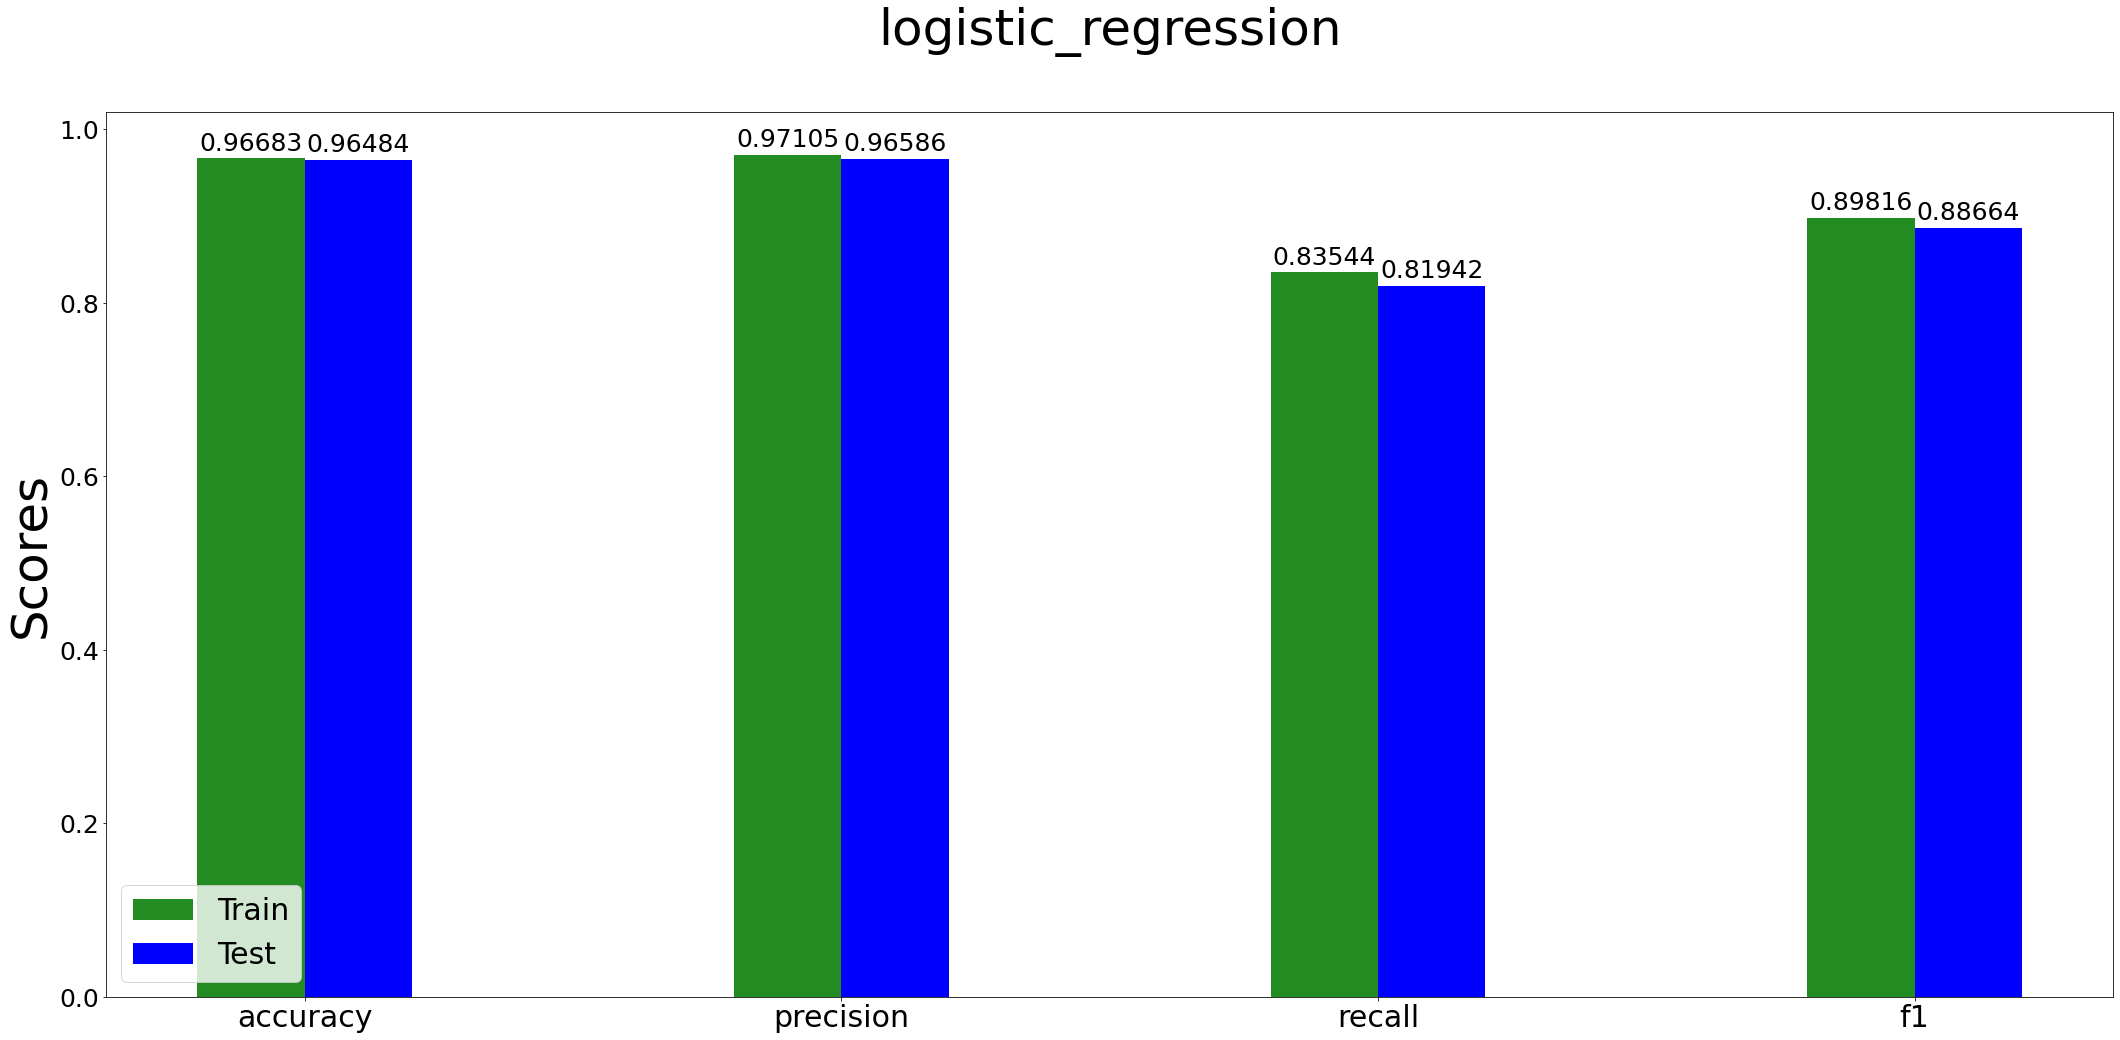

 

the algorithm is : naive_bayes
accuracy on train data:  0.9462434770176568
accuracy on test data:   0.9382504288164666 

precision on train data:  0.822500950209046
precision on test data:   0.7884914463452566 

recall on train data:  0.8836259697835851
recall on test data:   0.8637137989778535 

f1 on train data:  0.8519685039370077
f1 on test data:   0.824390243902439 

confusion matrix:



,Predicted Negative,Predicted Positive
Actual Negative,2775,136
Actual Positive,80,507


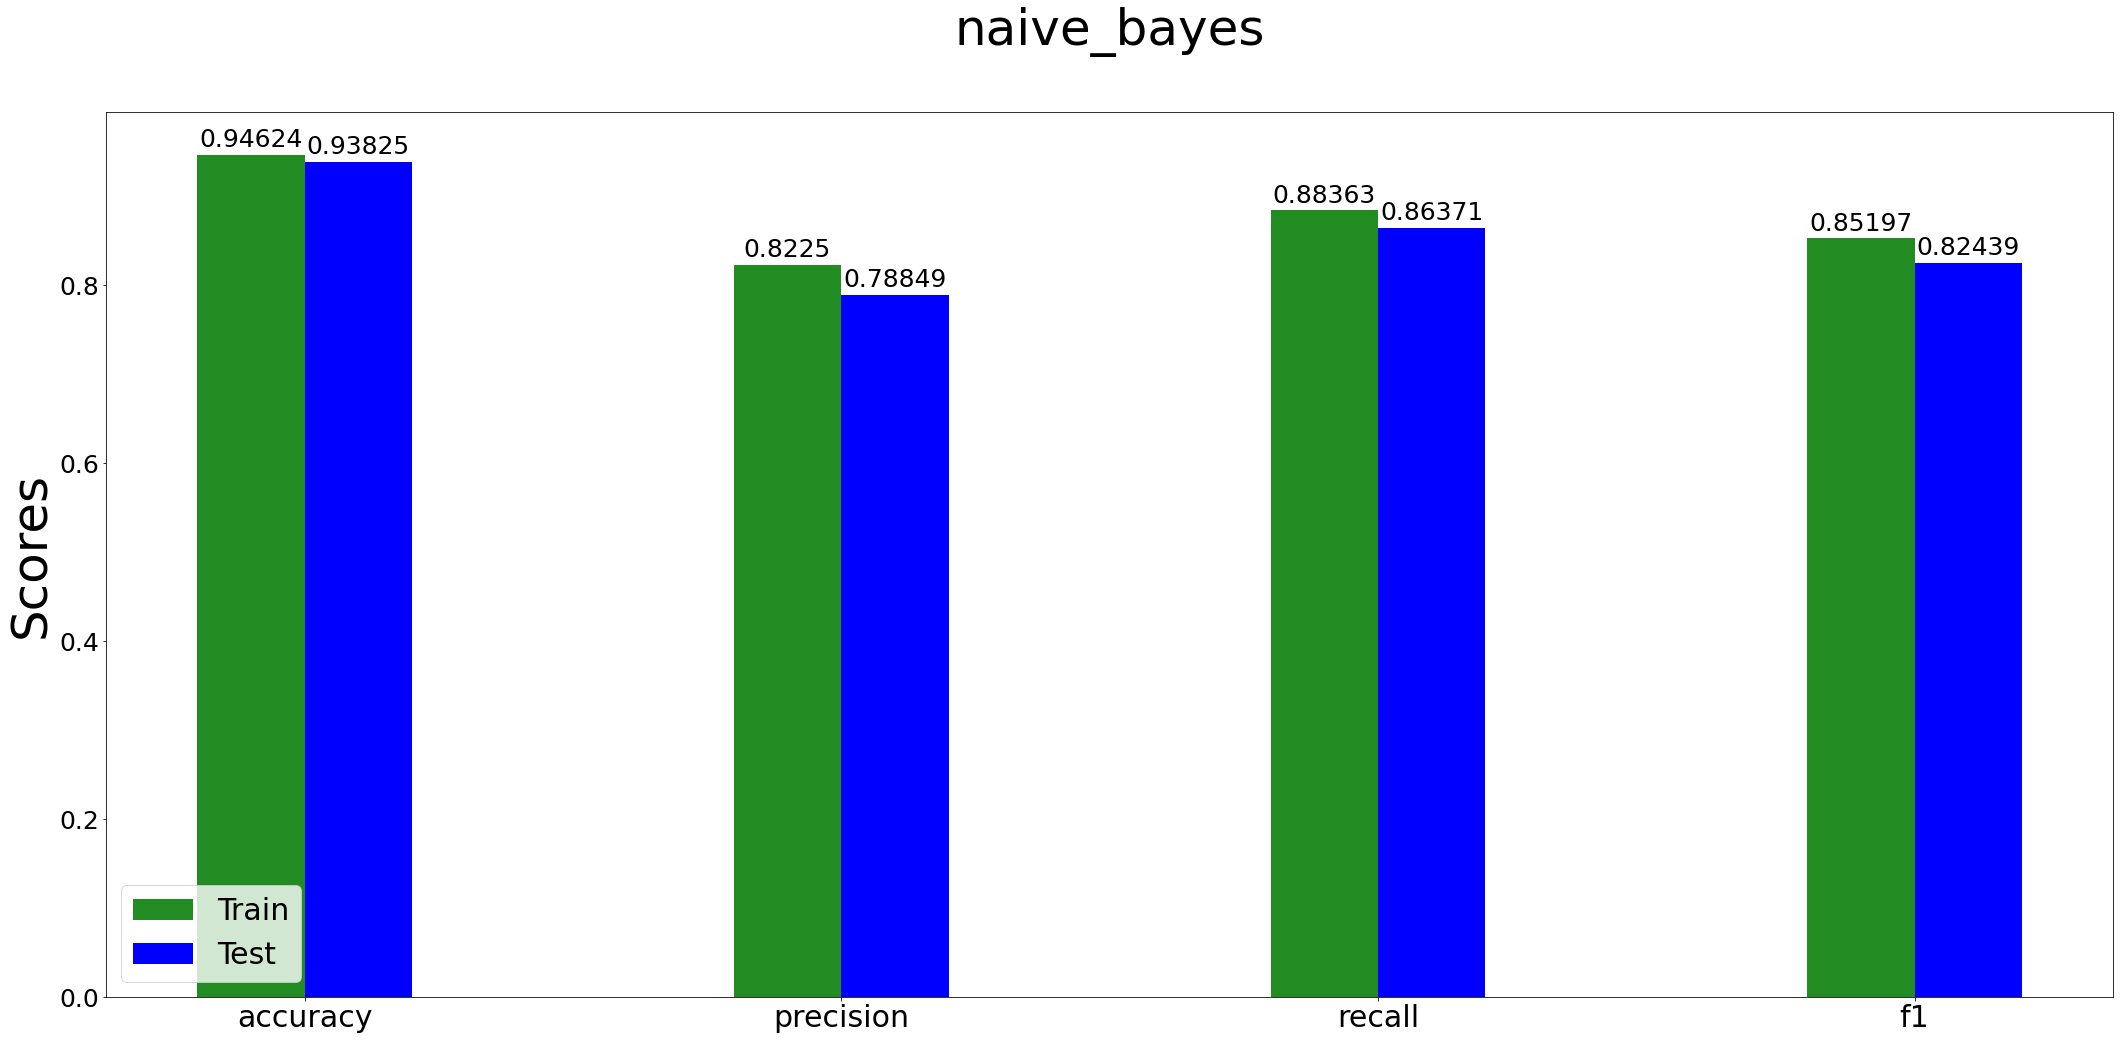

 

the algorithm is : svm
accuracy on train data:  0.979126456501537
accuracy on test data:   0.978273299028016 

precision on train data:  0.9847191011235955
precision on test data:   0.9848197343453511 

recall on train data:  0.8946508779093507
recall on test data:   0.8841567291311755 

f1 on train data:  0.9375267436884894
f1 on test data:   0.9317773788150808 

confusion matrix:



,Predicted Negative,Predicted Positive
Actual Negative,2903,8
Actual Positive,68,519


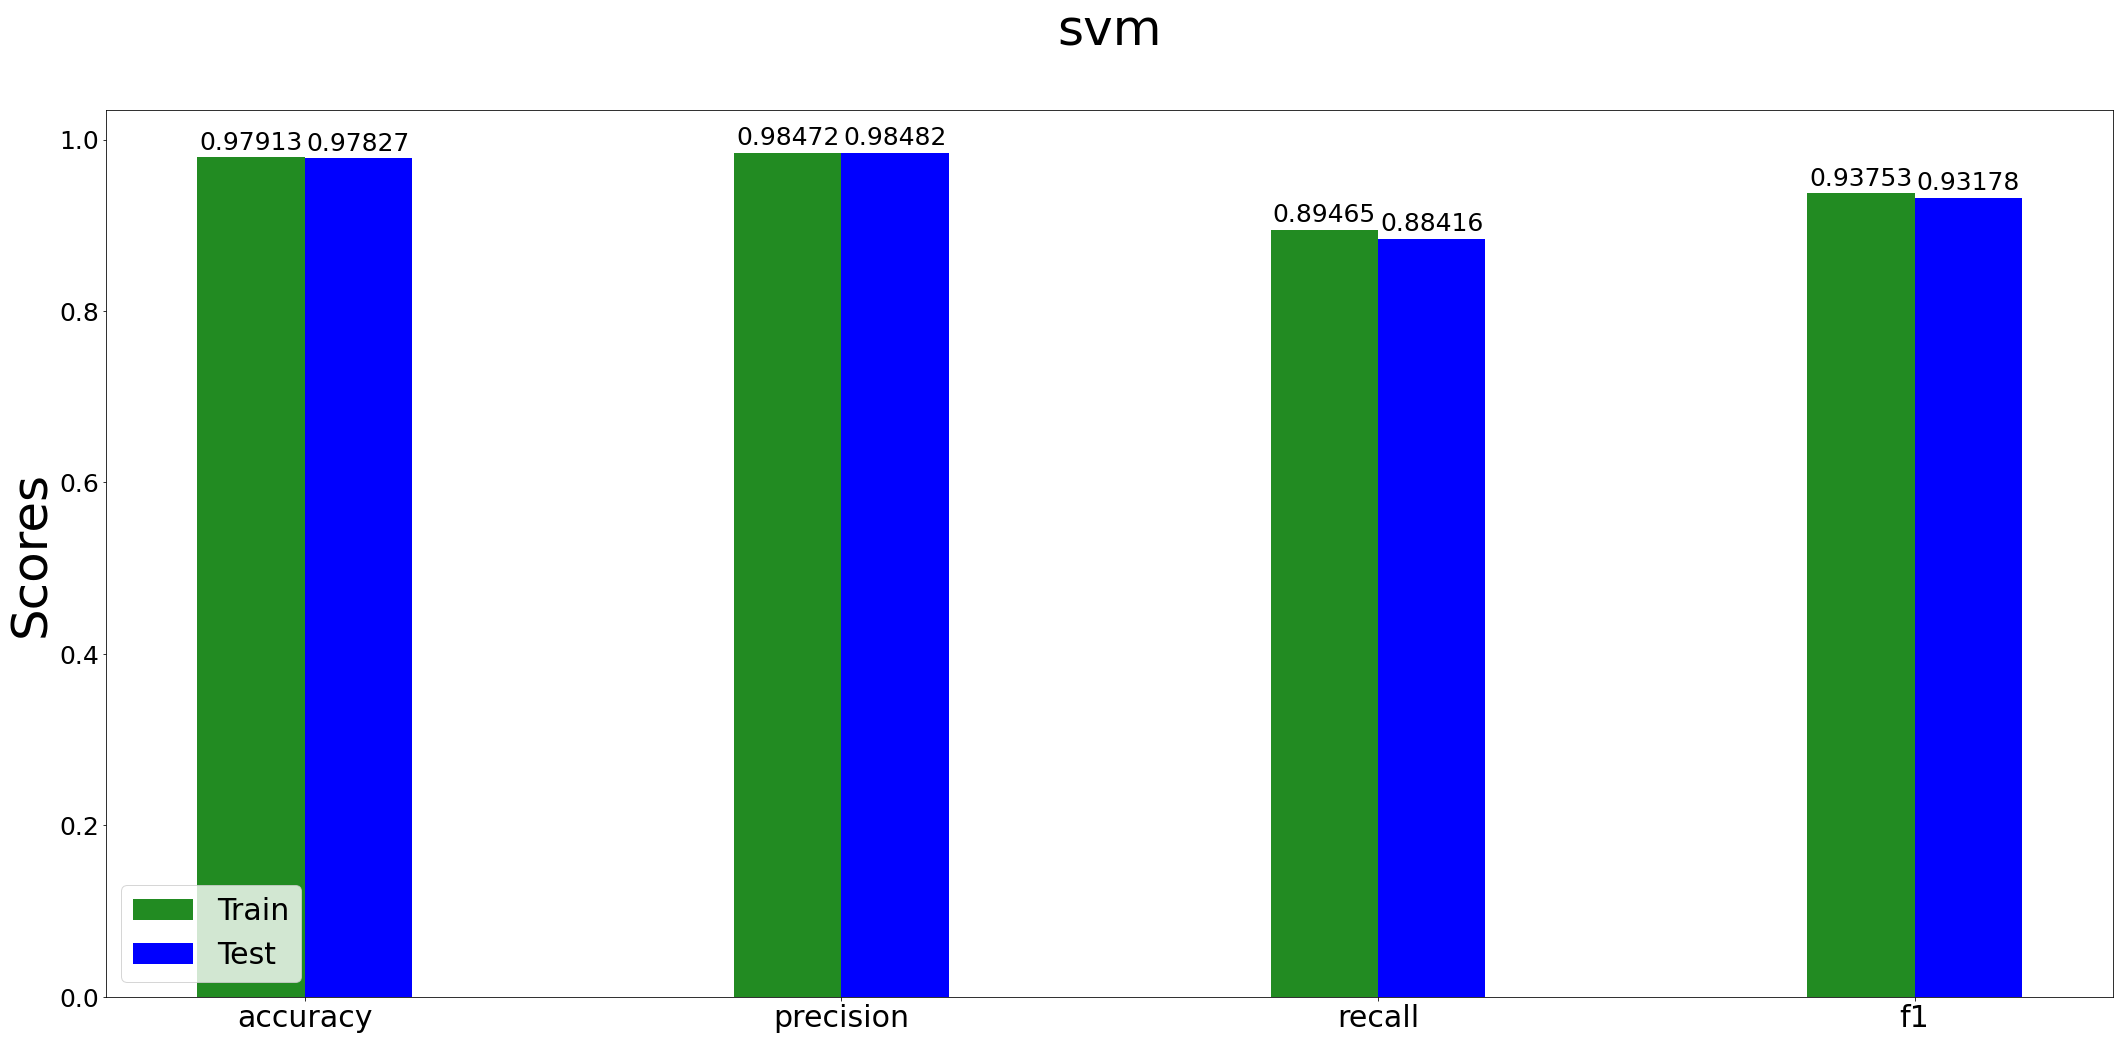

 

the algorithm is : knn
accuracy on train data:  0.9651154478518836
accuracy on test data:   0.934819897084048 

precision on train data:  0.9321286910533274
precision on test data:   0.8419047619047619 

recall on train data:  0.8636178031849735
recall on test data:   0.7529812606473595 

f1 on train data:  0.8965663416701992
f1 on test data:   0.7949640287769785 

confusion matrix:



,Predicted Negative,Predicted Positive
Actual Negative,2828,83
Actual Positive,145,442


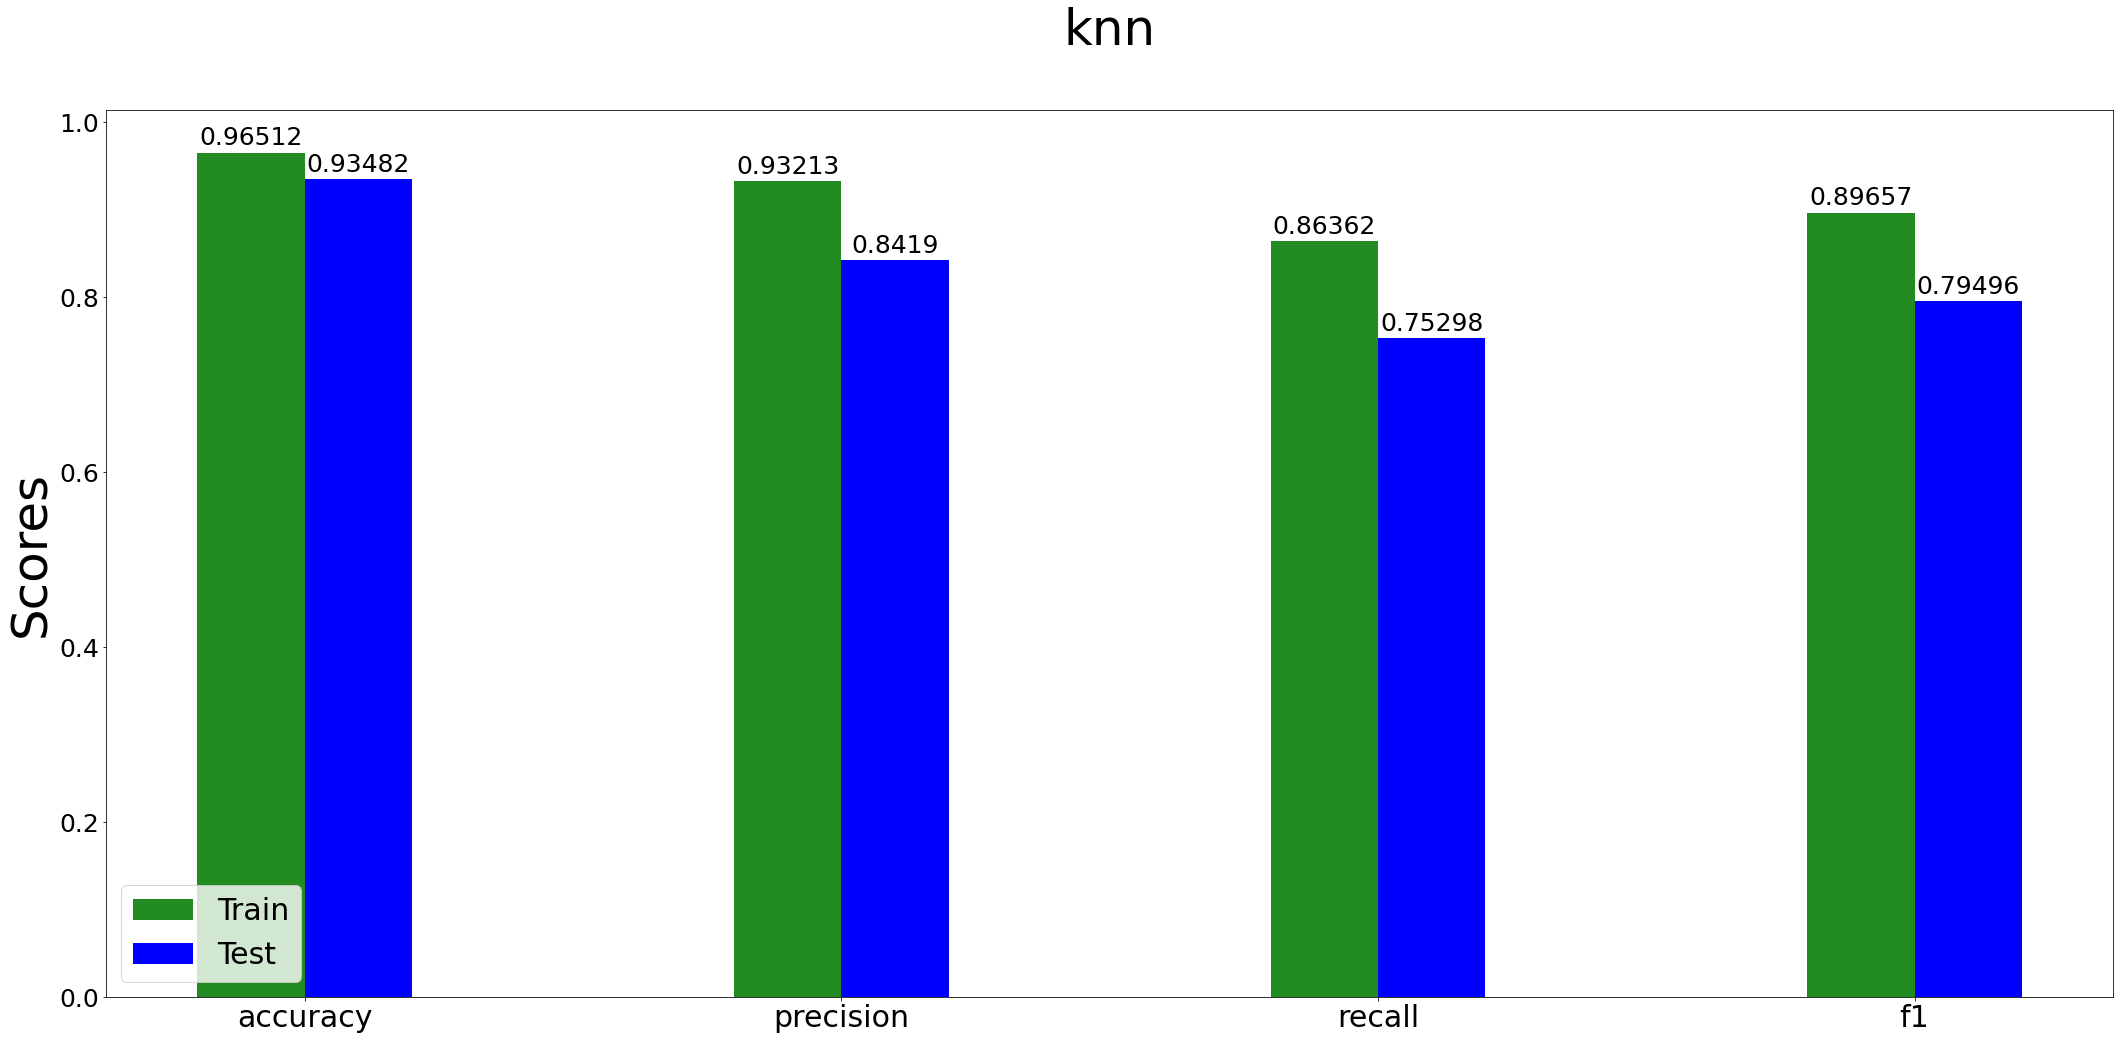

 

the algorithm is : decision_tree
accuracy on train data:  1.0
accuracy on test data:   1.0 

precision on train data:  1.0
precision on test data:   1.0 

recall on train data:  1.0
recall on test data:   1.0 

f1 on train data:  1.0
f1 on test data:   1.0 

confusion matrix:



,Predicted Negative,Predicted Positive
Actual Negative,2911,0
Actual Positive,0,587


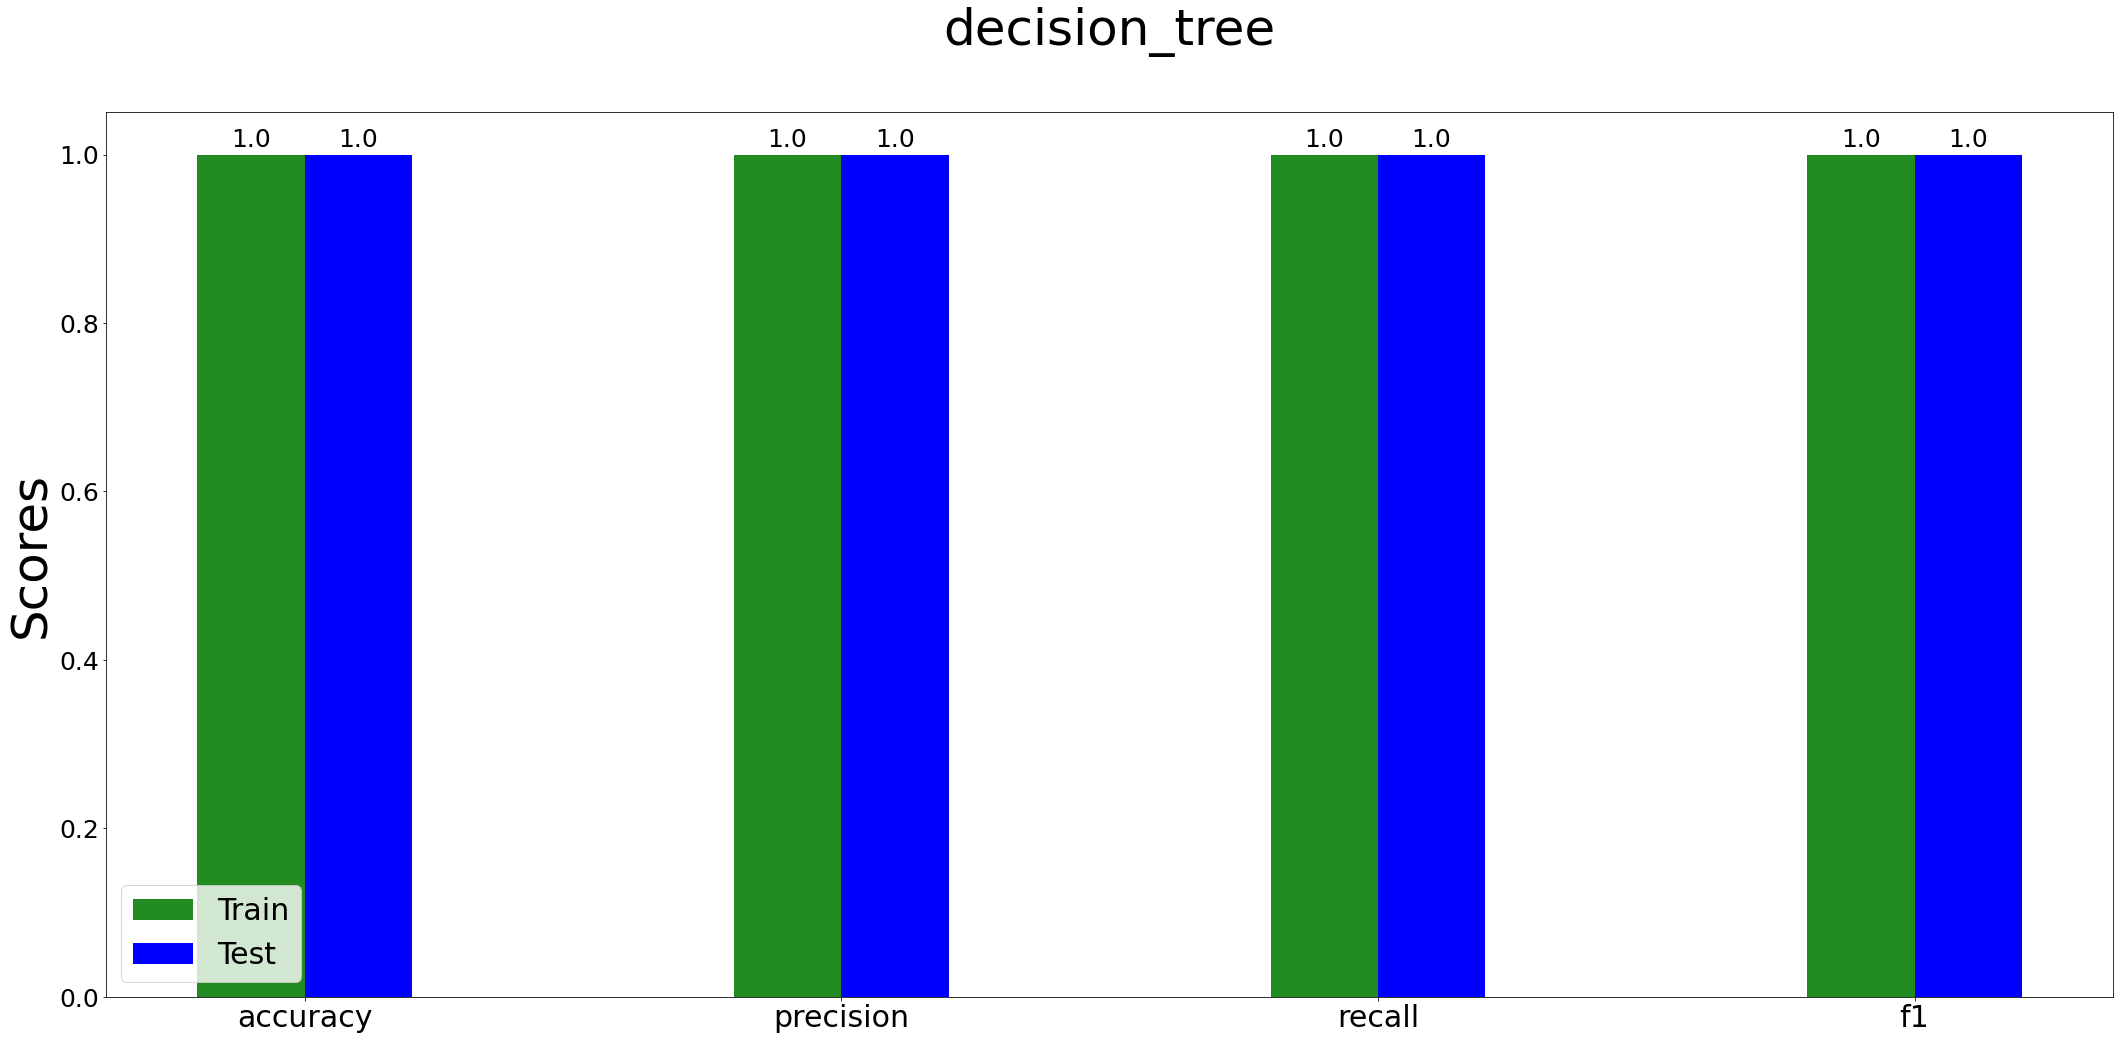

In [77]:

for alg in ["logistic_regression","naive_bayes","svm","knn","decision_tree"]:
    train_scores = []
    test_scores = []
    print(f" \n\nthe algorithm is : {alg}")
    for eval in evaluation:
        train_result = calc_evaluation_val(eval, y_train, predicted_train[alg])
        train_scores.append(round(train_result, 5))
        print(eval,"on train data: ",train_result)
        test_result = calc_evaluation_val(eval, y_test, predicted_test[alg])
        test_scores.append(round(test_result, 5))
        print(eval,"on test data:  ",test_result ,"\n")
    calc_evaluation_val('confusion_matrix', y_test,predicted_test[alg])
    print("\n")
    plot_res(evaluation,train_scores,test_scores,alg)

# And the best algorithm for our project is "Logistic Regression"